# Imports and configs

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [2]:
airline_passengers_data_path = "https://storage.googleapis.com/edulabs-public-datasets/airline-passengers.csv"
shampoo_sales_data_path = "https://storage.googleapis.com/edulabs-public-datasets/shampoo-sales.csv"

#This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
dayly_minimum_temp_data_path = "https://storage.googleapis.com/edulabs-public-datasets/daily-minimum-temperatures.csv"

# number of daily female births in California in 1959
dayly_total_female_births_data_path = "https://storage.googleapis.com/edulabs-public-datasets/daily-total-female-births.csv"

In [3]:
pd.options.plotting.backend = "plotly"


# Load Data

In [4]:
airline_df = pd.read_csv(airline_passengers_data_path, parse_dates=["Month"])
# airline_df
# airline_df.info()

In [5]:
from datetime import datetime
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')
sales_df = pd.read_csv(shampoo_sales_data_path, parse_dates=['Month'], date_parser=parser, index_col='Month')
# sales_df

<ipython-input-5-6738a4332b56>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  sales_df = pd.read_csv(shampoo_sales_data_path, parse_dates=['Month'], date_parser=parser, index_col='Month')


In [6]:
temp_df = pd.read_csv(dayly_minimum_temp_data_path, parse_dates=["Date"])
# temp_df


In [7]:
births_df = pd.read_csv(dayly_total_female_births_data_path, parse_dates=["Date"])
# births_df

# Useful pandas methods for feature engineering

In [ ]:
sales_df.set_index("Month", inplace=True)

## Lag features

In [ ]:
sales_df.shift(1)

In [ ]:
df = pd.concat([sales_df.shift(1), sales_df], axis=1)
df

## Rolling window statistics

In [ ]:
shifted = sales_df.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
df = pd.concat([means, sales_df], axis=1)
df.columns = ['mean(t-1,t)', 't+1']

In [ ]:
df

# Data visualization

## Line plots

In [ ]:
temp_df.set_index("Date", inplace=True)
# temp_df

In [ ]:
px.line(temp_df)

In [ ]:
temp_df

In [ ]:
# Group by year
groups = temp_df.groupby(pd.Grouper(freq='YE'))

# Create a DataFrame with each column as one year
years = pd.DataFrame({name.year: group.values.flatten() for name, group in groups})

# Create subplots: one per year
fig = make_subplots(rows=len(years.columns), cols=1, shared_xaxes=False, shared_yaxes=False,
                    subplot_titles=[str(year) for year in years.columns])

# Add each year’s data as a line plot in its own subplot
for i, year in enumerate(years.columns):
    fig.add_trace(go.Scatter(y=years[year], mode='lines', name=str(year)),
                  row=i+1, col=1)

# Layout settings
fig.update_layout(height=300*len(years.columns), showlegend=False, title="Daily Minimum Temperatures by Year")
fig.show()


## Histogram

In [ ]:
px.histogram(temp_df, x="Temp")

## Box plots

In [ ]:
px.box(temp_df, y="Temp",color=temp_df.index.year)

In [ ]:
px.box(temp_df, y="Temp",color=temp_df.index.month)

## Heat Map

In [ ]:


import plotly.express as px


# Create the heatmap
fig = px.imshow(temp_df.pivot_table(index=temp_df.index.month, columns=temp_df.index.year, values="Temp"),
                labels=dict(x="Year", y="Month", color="Temperature"),
                x=temp_df.index.year.unique(),
                y=temp_df.index.month.unique(),
                color_continuous_scale="Viridis")  # Choose a suitable color scale

fig.update_layout(title="Monthly Minimum Temperatures")
fig.show()


## Lag scatter plots

In [ ]:
# prompt: create lag scatter plot for temp_df, add axis labels in terms of t-1, t

fig = px.scatter(temp_df, x="Temp", y=temp_df["Temp"].shift(1))
fig.update_layout(title="Lag Scatter Plot of Daily Minimum Temperatures",
                  xaxis_title="t",
                  yaxis_title="t-1")
fig.show()


In [ ]:
fig = px.scatter(temp_df, x="Temp", y=temp_df["Temp"].shift(10))
fig.update_layout(title="Lag Scatter Plot of Daily Minimum Temperatures",
                  xaxis_title="t",
                  yaxis_title="t-10")
fig.show()

In [ ]:
fig = px.scatter(temp_df, x="Temp", y=temp_df["Temp"].shift(50))
fig.update_layout(title="Lag Scatter Plot of Daily Minimum Temperatures",
                  xaxis_title="t",
                  yaxis_title="t-50")
fig.show()

## Autocorrelation plots

### ACF

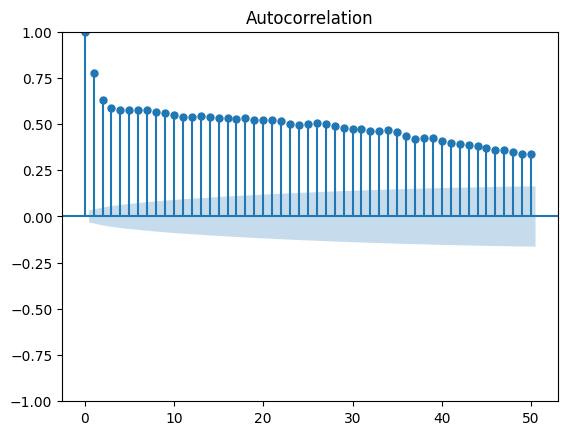

In [8]:
plot_acf(temp_df['Temp'], lags=50) # Adjust lags as needed
plt.show()

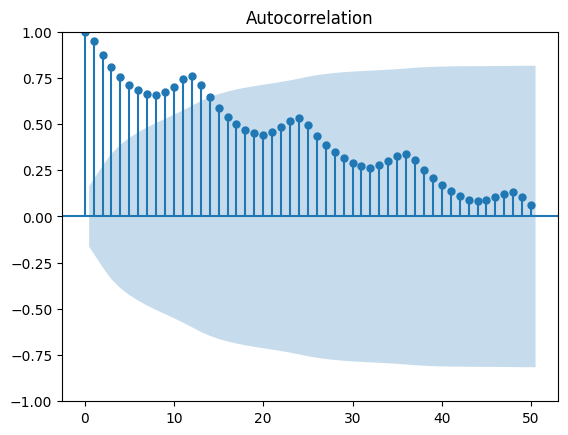

In [9]:
plot_acf(airline_df['Passengers'], lags=50) # Adjust lags as needed
plt.show()

### PACF

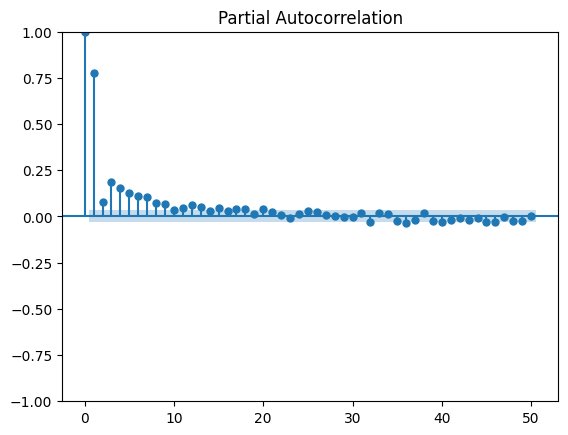

In [12]:
plot_pacf(temp_df['Temp'], lags=50) # Adjust lags as needed
plt.show()

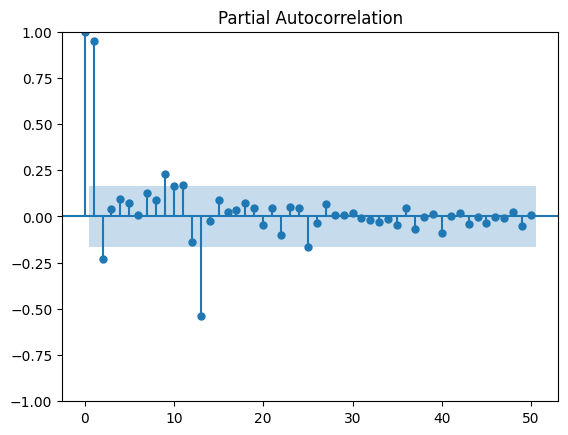

In [13]:
plot_pacf(airline_df['Passengers'], lags=50) # Adjust lags as needed
plt.show()

# Resampling and interpolating

In [ ]:
sales_df.head()

In [ ]:
upsampled = sales_df.resample('D').mean()

In [ ]:
upsampled

In [ ]:
upsampled = upsampled.interpolate(method='linear')

In [ ]:
px.line(upsampled)

## Downsample

In [ ]:
sales_df.head()

In [ ]:
sales_df.resample('QE').sum()

# Temporal Structure

## Stationarity

In [ ]:
sales_df.rolling(window=12).mean().plot()

In [ ]:
sales_df.rolling(window=12).var().plot()

In [ ]:
airline_df.set_index("Month").plot()

## Removing Trend and Seasonality

### Differencing

In [ ]:
sales_df.plot()

In [ ]:

# First-order differencing
diff_ts = sales_df["Sales"].diff().dropna()

fig = go.Figure()
fig.add_trace(go.Scatter(x=sales_df.index, y=sales_df["Sales"], name="Original"))
fig.add_trace(go.Scatter(x=diff_ts.index, y=diff_ts, name="Differenced"))
fig.update_layout(title="Simple Differencing", template="plotly_white", yaxis_title="Value")
fig.show()

### Seasonal Differencing

In [ ]:
df = airline_df.set_index("Month")

In [ ]:
# First-order differencing
diff_ts = df["Passengers"].diff().dropna()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Passengers"], name="Original"))
fig.add_trace(go.Scatter(x=diff_ts.index, y=diff_ts, name="Differenced"))
fig.update_layout(title="Simple Differencing", template="plotly_white", yaxis_title="Value")
fig.show()

In [ ]:
seasonal_diff = df["Passengers"].diff(12).dropna()

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Passengers"], name="Original with Seasonality"))
fig.add_trace(go.Scatter(x=seasonal_diff.index, y=seasonal_diff, name="Seasonally Differenced"))
fig.update_layout(title="Seasonal Differencing (lag=12)", template="plotly_white", yaxis_title="Value")
fig.show()

In [ ]:
seasonal_diff = diff_ts.diff(12).dropna()

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Passengers"], name="Original with Seasonality"))
fig.add_trace(go.Scatter(x=seasonal_diff.index, y=seasonal_diff, name="Seasonally Differenced"))
fig.update_layout(title="Trend and Seasonal Differencing (lag=12)", template="plotly_white", yaxis_title="Value")
fig.show()

### Detrending via Linear Regression

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.arange(len(df))
y = df['Passengers']
model.fit(x.reshape(-1, 1), y)

trend_est = model.predict(x.reshape(-1, 1))
detrended = df['Passengers'] - trend_est

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=df['Passengers'], name="Original"))
fig.add_trace(go.Scatter(x=x, y=trend_est, name="Regression Line"))
fig.add_trace(go.Scatter(x=x, y=detrended, name="Detrended (regression)"))
fig.update_layout(title="Detrending via Regression", template="plotly_white", yaxis_title="Value")
fig.show()


### Decomposition-Based Detrending (Using statsmodels)

In [ ]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


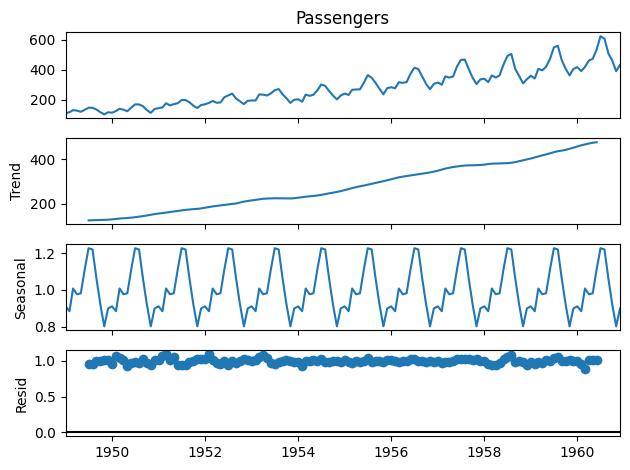

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose (assumes additive model)
result = seasonal_decompose(
    df['Passengers'],
    # model='additive', # Use additive when seasonal variation is roughly constant over time
    model='multiplicative', # Use multiplicative when seasonal variation increases as the trend increases
    period=12 # try other periods
)

result.plot().show()

# White Noise

In [ ]:
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
series.describe()

,0
count,1000.000000
mean,-0.013222
std,1.003685
min,-2.961214
25%,-0.684192
50%,-0.010934
75%,0.703915
max,2.737260


In [ ]:
px.line(series)

In [ ]:
px.histogram(series)

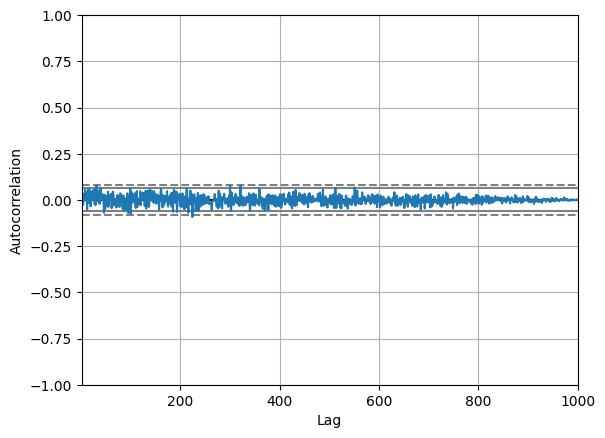

In [ ]:
autocorrelation_plot(series)
pyplot.show()

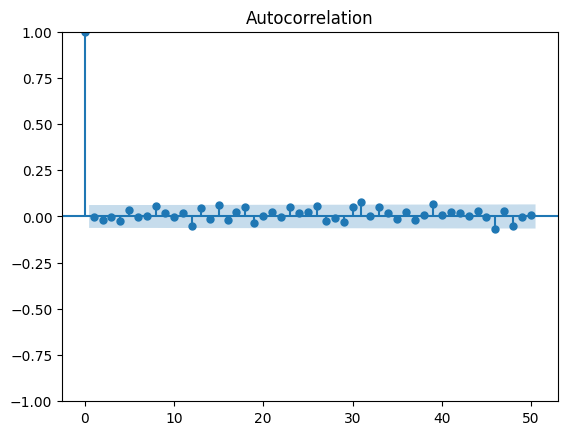

In [ ]:
plot_acf(series, lags=50) # Adjust lags as needed
plt.show()

# Random Walk

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_steps = 2000             # Number of time steps
start_value = 0           # Starting value of the series
noise_std = 1.0           # Standard deviation of the noise

# Generate white noise (epsilon_t)
noise = np.random.normal(loc=0, scale=noise_std, size=n_steps)

# Create the random walk
random_walk = np.cumsum(noise) + start_value
px.line(random_walk)



## Differencing Random Walk

###**Short exercise**

Apply simple trend differencing `diff()` on `random_walk` data and plot the residulas after differencing.

What do you see?

### Random Walk Data

In [ ]:
plot_acf(random_walk, lags=50)
plt.show()

In [ ]:
random_walk = pd.Series(random_walk)

# Rolling variance
rolling_window = 20
rolling_var = random_walk.rolling(window=rolling_window).var()
cumulative_var = random_walk.expanding().var()

# Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=random_walk.index, y=random_walk,
    mode='lines', name='Time Series'
))

fig.add_trace(go.Scatter(
    x=rolling_var.index, y=rolling_var,
    mode='lines', name=f'Rolling Variance (window={rolling_window})',
    line=dict(color='orange')
))



fig.add_trace(go.Scatter(
    x=random_walk.index, y=cumulative_var,
    mode='lines', name='Cumulative Variance',
    line=dict(color='green')
))

fig.update_layout(
    title='Time Series and Rolling Variance',
    xaxis_title='Date',
    yaxis_title='Value / Variance',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()

### Not random Walk Data

In [ ]:
plot_acf(temp_df['Temp'], lags=50)
plt.show()

In [ ]:
df = temp_df.set_index('Date')

# Rolling variance
rolling_window = 20
rolling_var = df.rolling(window=rolling_window).var()
cumulative_var = df.expanding().var()




# Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index, y=df['Temp'],
    mode='lines', name='Time Series'
))

fig.add_trace(go.Scatter(
    x=rolling_var.index, y=rolling_var['Temp'],
    mode='lines',
    name=f'Rolling Variance (window={rolling_window})',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=cumulative_var.index, y=cumulative_var['Temp'],
    mode='lines', name='Cumulative Variance',
    line=dict(color='green')
))

fig.update_layout(
    title='Time Series and Rolling Variance',
    xaxis_title='Date',
    yaxis_title='Value / Variance',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()

## ADF test

### Random walk (not stationary)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test
result = adfuller(random_walk)

# Display results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")


ADF Statistic: 0.187889806120178
p-value: 0.9715741318314679
Critical Value (1%): -3.4336254962865045
Critical Value (5%): -2.862986937508278
Critical Value (10%): -2.567540287745173


### Stationary data

In [ ]:
temp_df["Temp"].plot()

In [ ]:
airline_df["Passengers"].plot()

In [ ]:
# Run ADF test
result = adfuller(temp_df["Temp"])

# Display results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: -4.4448049246117
p-value: 0.0002470826300360994
Critical Value (1%): -3.4321532327220154
Critical Value (5%): -2.862336767636517
Critical Value (10%): -2.56719413172842


###**Exercise 1**

1. Use `airline_df` dataset
2. Check whether the raw passengers data is stationary:
- The mean (average value) is constant
- The variance (spread or volatility) is constant
3. Run adfuler test on the raw data and check whether the data is stationary
4. Removing **trend** by differencing (`diff()`)
5. Run adfuller test on differenced data and see whether test results change - explain what you see in the results
6. Use Linear regresison to remove trend
7. Run adfuller test on the untrended data with linear regression and analyse the results - is now data stationary?
8. In addition to removing trend, now remove seasonality component as well
9. Run adfuller test again and analyze the results - is data stationary now?


###**Exercise 2**

This time you are going to use `births_df`

1. Run data visualizations that might help you to understand whether the data is stationary / trend / seasonality, or just get more insights about the data
2. Use autocorrelation plots to understand how many lags (timesteps backward) might be useful to model upcoming time step.
3. Use adfuller test to find out whether the data is stationary